<h1>Importar librerias</h1>

In [1]:
from sklearn.tree import plot_tree
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder   #Transformar en un array las varibles object
from sklearn.model_selection import train_test_split  #dividir el data_set en data_train y data_test 
from sklearn.tree import DecisionTreeClassifier   #generar arboles de decision
from sklearn.linear_model import LogisticRegression   #generar la regresion logistica
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import f1_score #metrica de evaluacion
from sklearn.model_selection import RandomizedSearchCV  #probar con distintas caracteristicas y ver la mejor
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier ## random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<h1> Abrir datos y analizar datos </h1>

In [3]:
#Guardamos en una variable el df 
df=pd.read_excel('default_of_credit_card _clients.xls', header=1)
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.isna().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [6]:
print('numero de caracteristicas:', len(df.columns))
print('numero de datos:', len(df))

numero de caracteristicas: 25
numero de datos: 30000


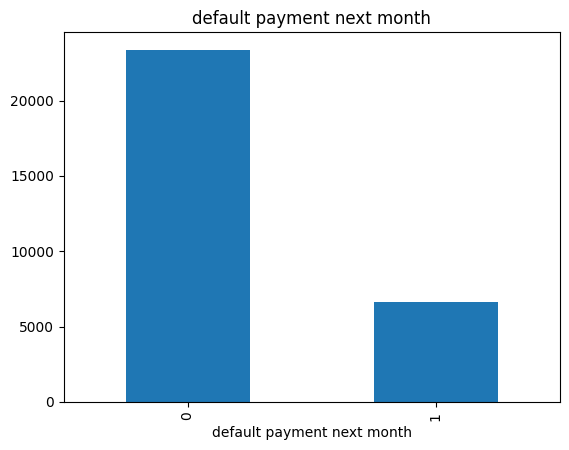

In [8]:
#Revisamos si hay una diferencia de clase en la variable default payment next month
df['default payment next month'].value_counts().plot(kind="bar")
plt.title("default payment next month")
plt.show()

<text>Si existe diferencia, por lo que al momento de partir la data en train, val y test lo haremos de manera proporcional en base a la clase dependiente, aparte para la base train usaremos la tecnica SMOTE para trabajar esta desigualdad<text>

In [9]:
#información datos numericos (en caso de ser necesario se deben normalizar o estandarizar los datos, dependiendo del algoritmo a usar y la diferencia que exista entre ellos)
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


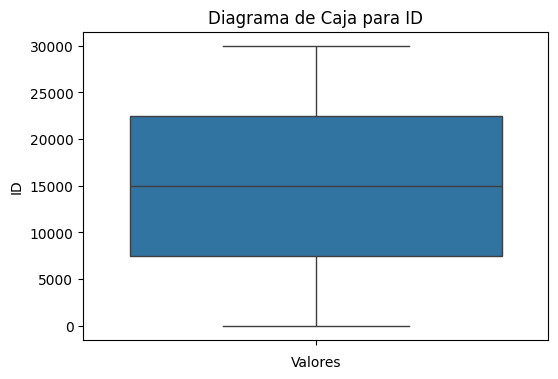

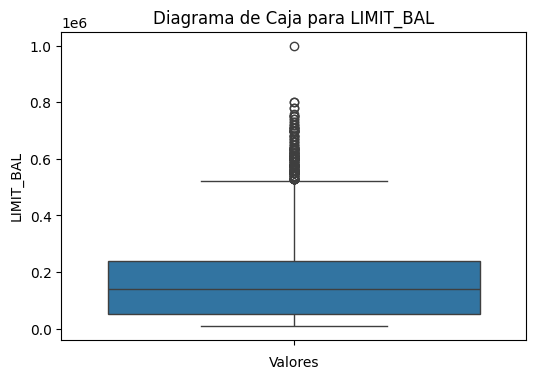

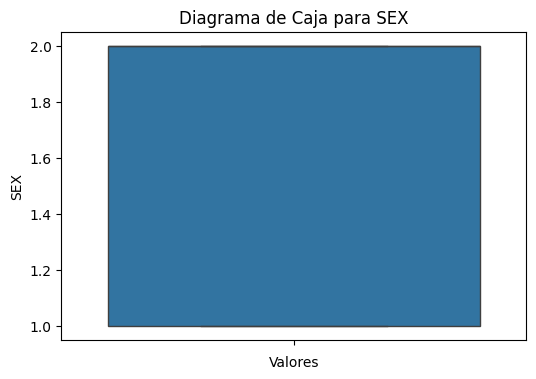

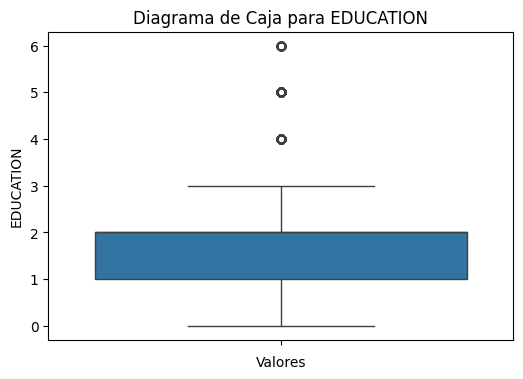

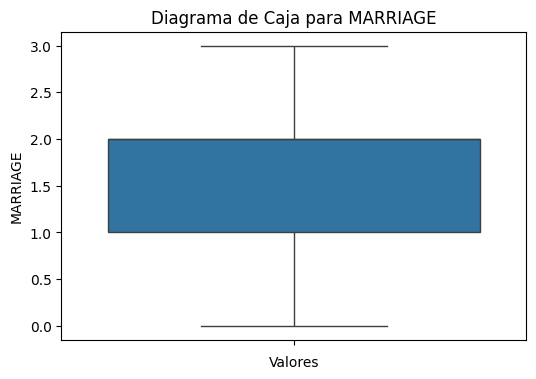

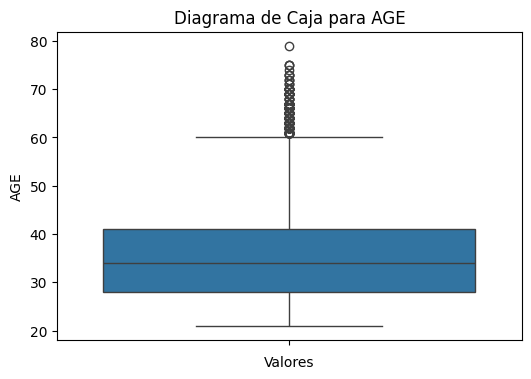

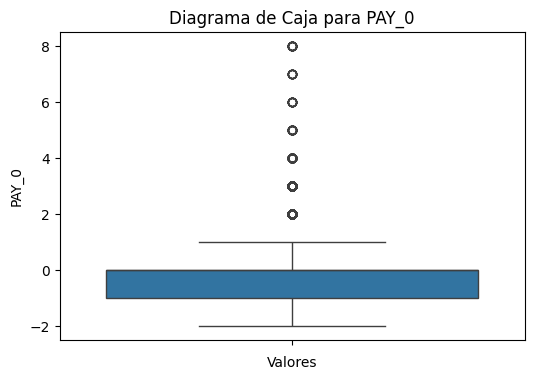

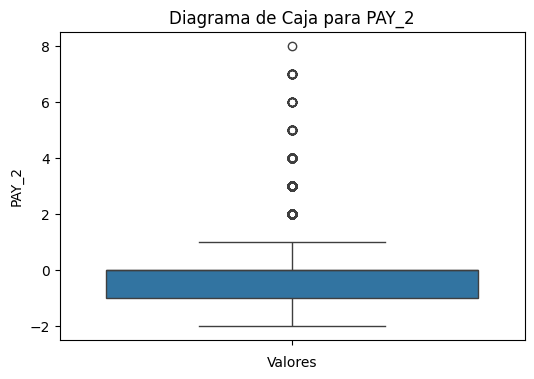

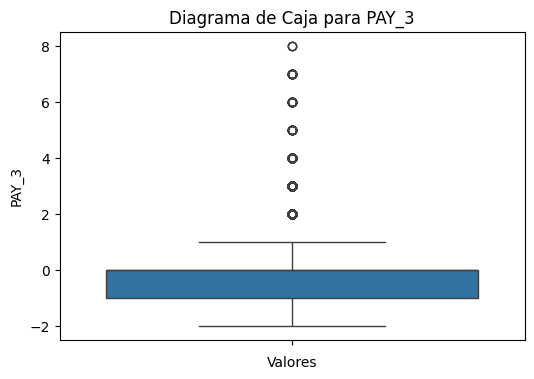

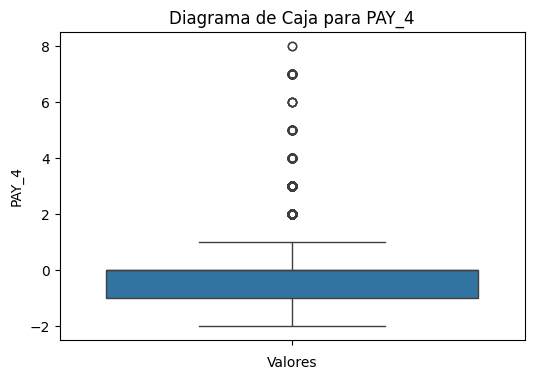

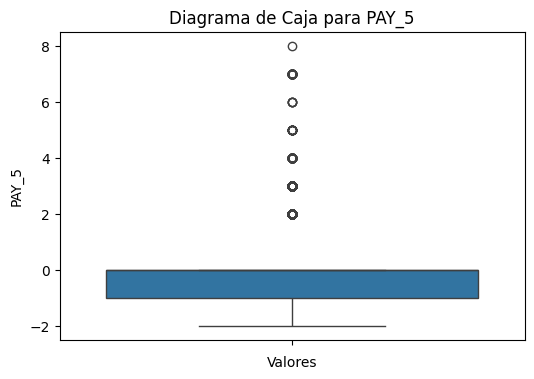

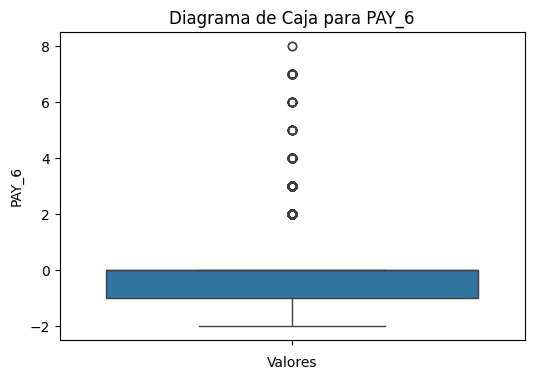

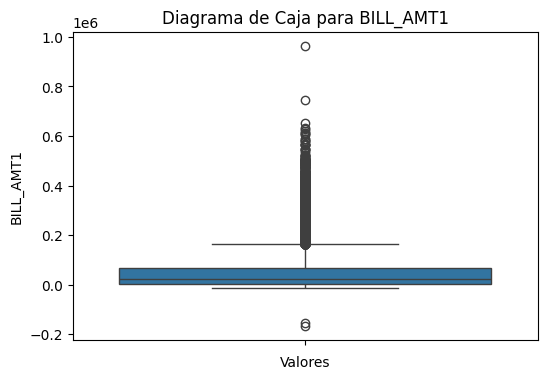

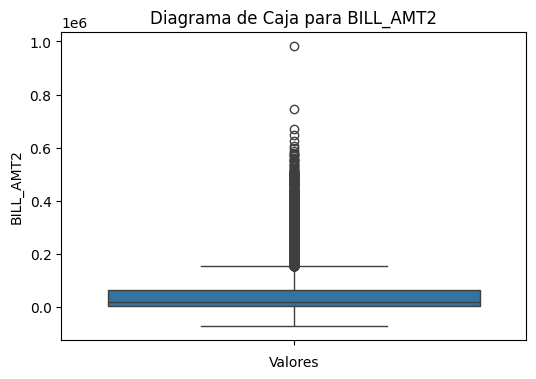

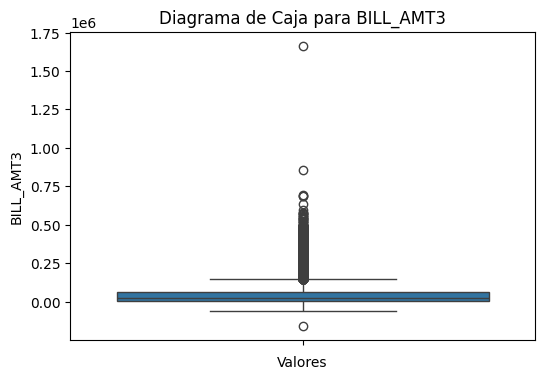

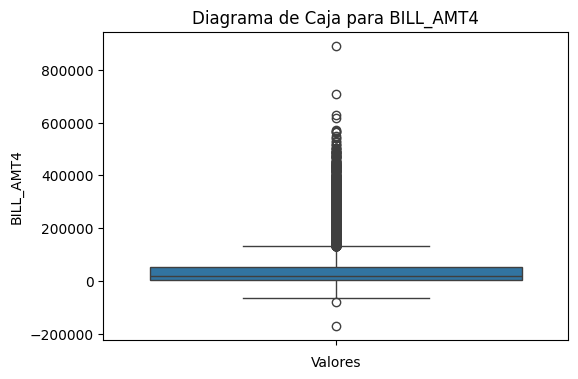

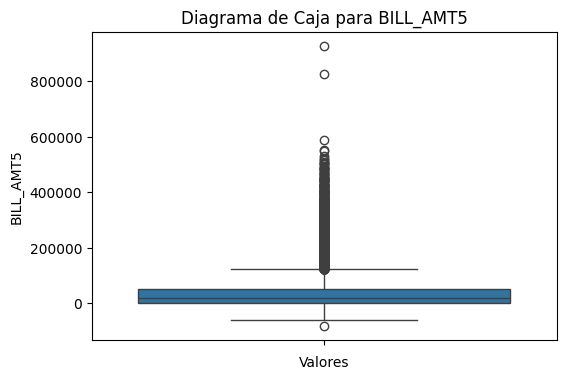

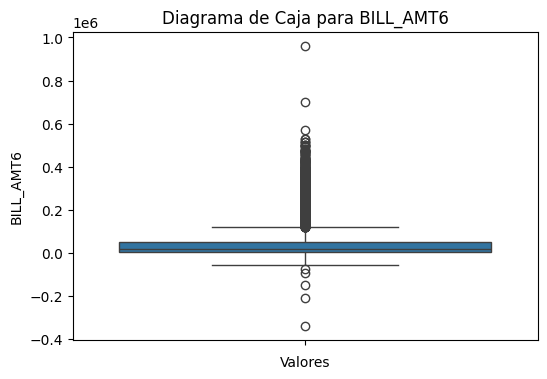

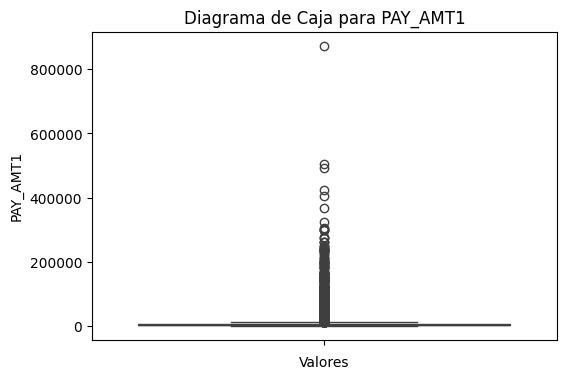

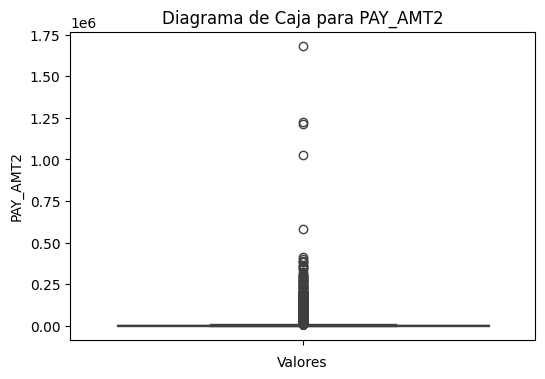

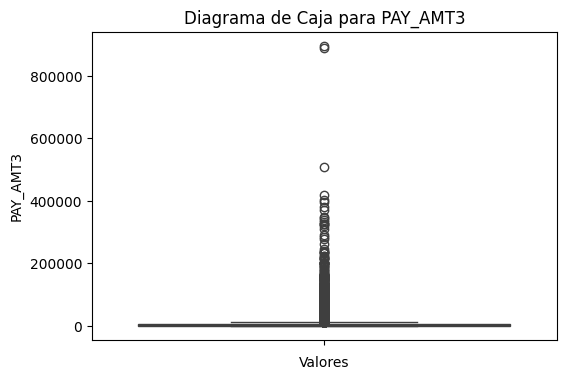

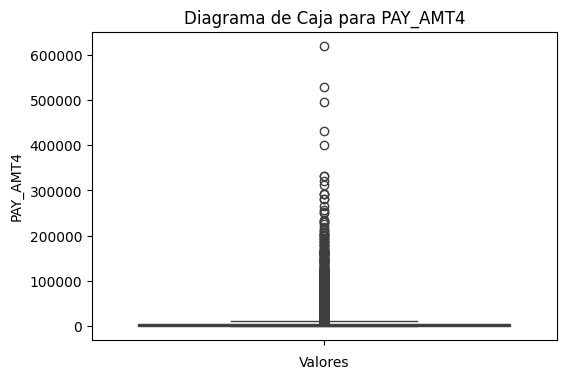

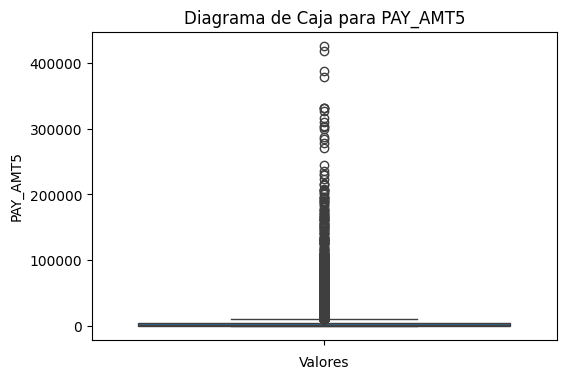

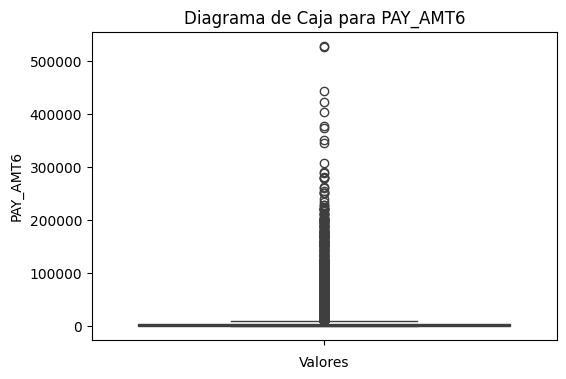

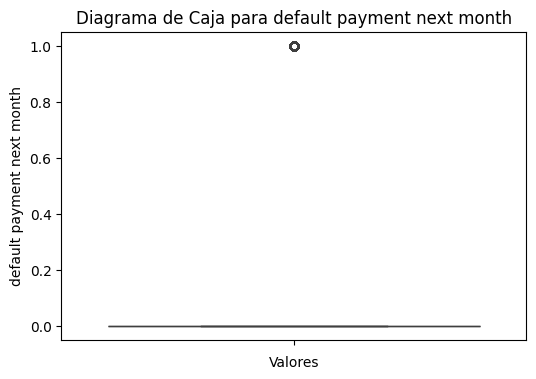

In [11]:
#Revisaremos con diagramas de caja los valoress de cada categoría, con el objetivo de ver si existen valores atipicos
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    sns.boxplot(data=df[column])  # Graficar diagrama de caja
    plt.title(f'Diagrama de Caja para {column}')  # Título del gráfico
    plt.xlabel('Valores')  # Etiqueta del eje x
    plt.ylabel(column)  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

In [12]:
#Copiamos la base de datos y eliminamos la columna ID ya que no aporta
df_c=df.copy()
df_c=df_c.drop("ID", axis=1)
df_c.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#revisamos las correlaciones entre todas las variables y la variable dependiente
matrix_corr=df_c.corr()
matrix_corr['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment next month, dtype: float64

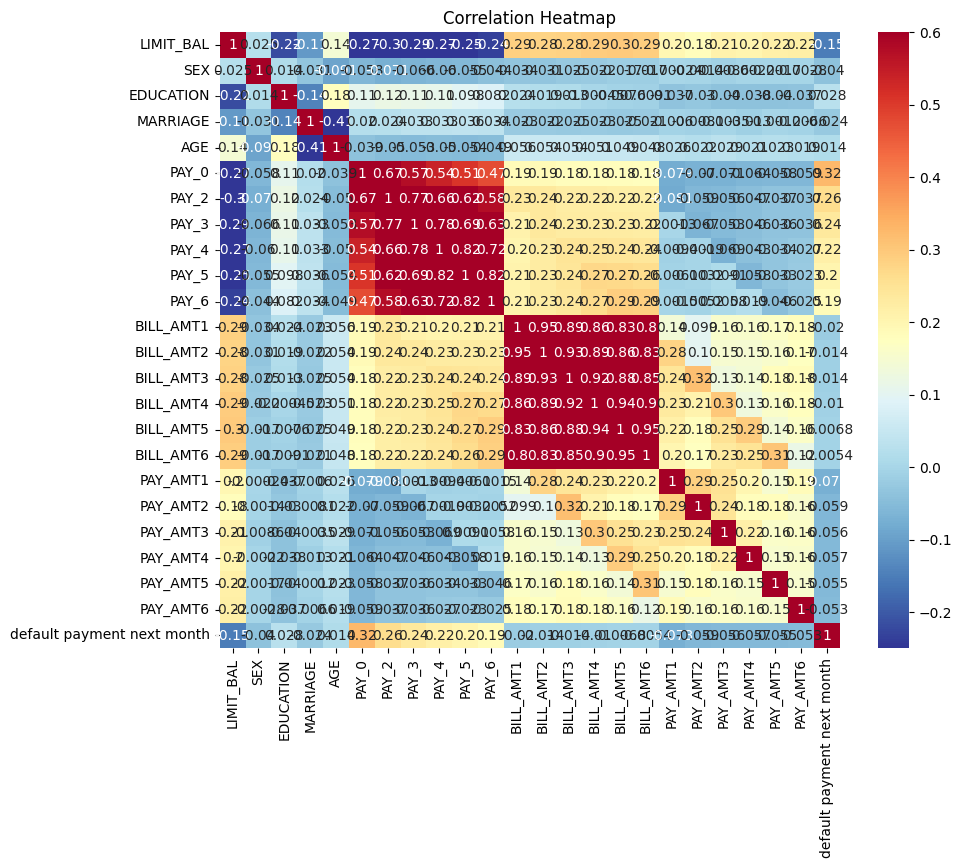

In [18]:
# Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10,8))
corr = matrix_corr
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

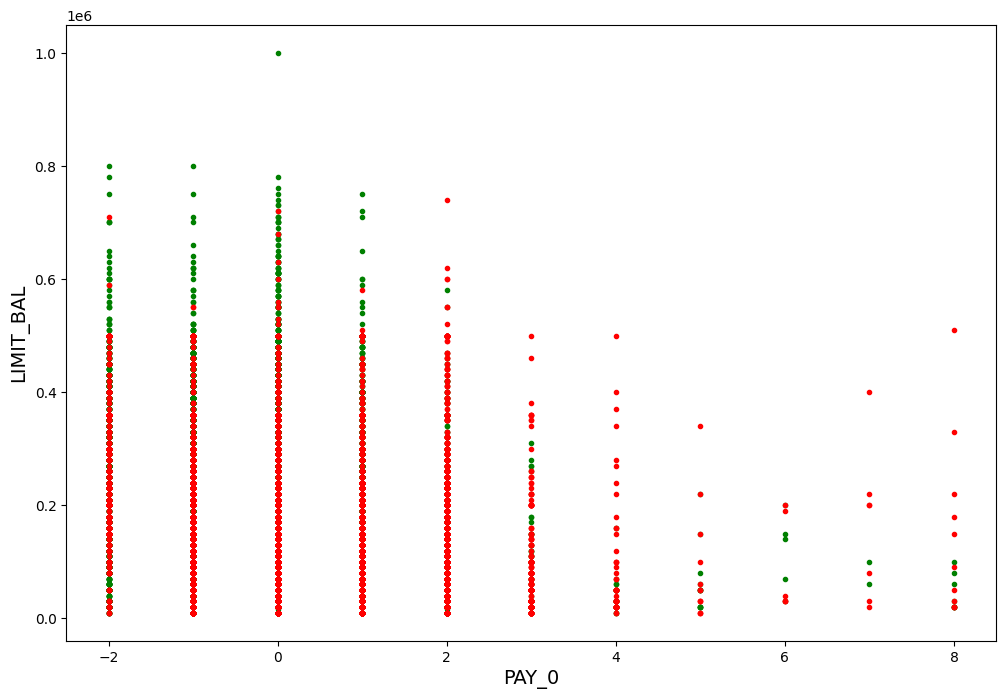

In [22]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 8))
plt.scatter(df_c["PAY_0"][df_c['default payment next month'] == 0], df_c["LIMIT_BAL"][df_c['default payment next month'] == 0], c="g", marker=".")
plt.scatter(df_c["PAY_0"][df_c['default payment next month'] == 1], df_c["LIMIT_BAL"][df_c['default payment next month'] == 1], c="r", marker=".")
plt.xlabel("PAY_0", fontsize=14)
plt.ylabel("LIMIT_BAL", fontsize=14)
plt.show()

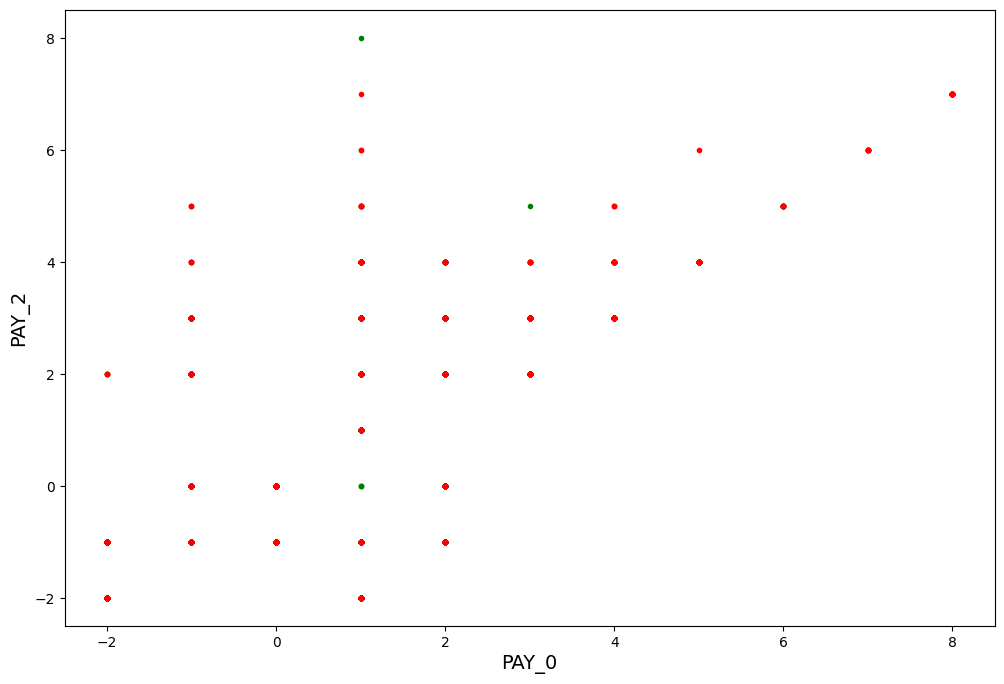

In [23]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 8))
plt.scatter(df_c["PAY_0"][df_c['default payment next month'] == 0], df_c["PAY_2"][df_c['default payment next month'] == 0], c="g", marker=".")
plt.scatter(df_c["PAY_0"][df_c['default payment next month'] == 1], df_c["PAY_2"][df_c['default payment next month'] == 1], c="r", marker=".")
plt.xlabel("PAY_0", fontsize=14)
plt.ylabel("PAY_2", fontsize=14)
plt.show()

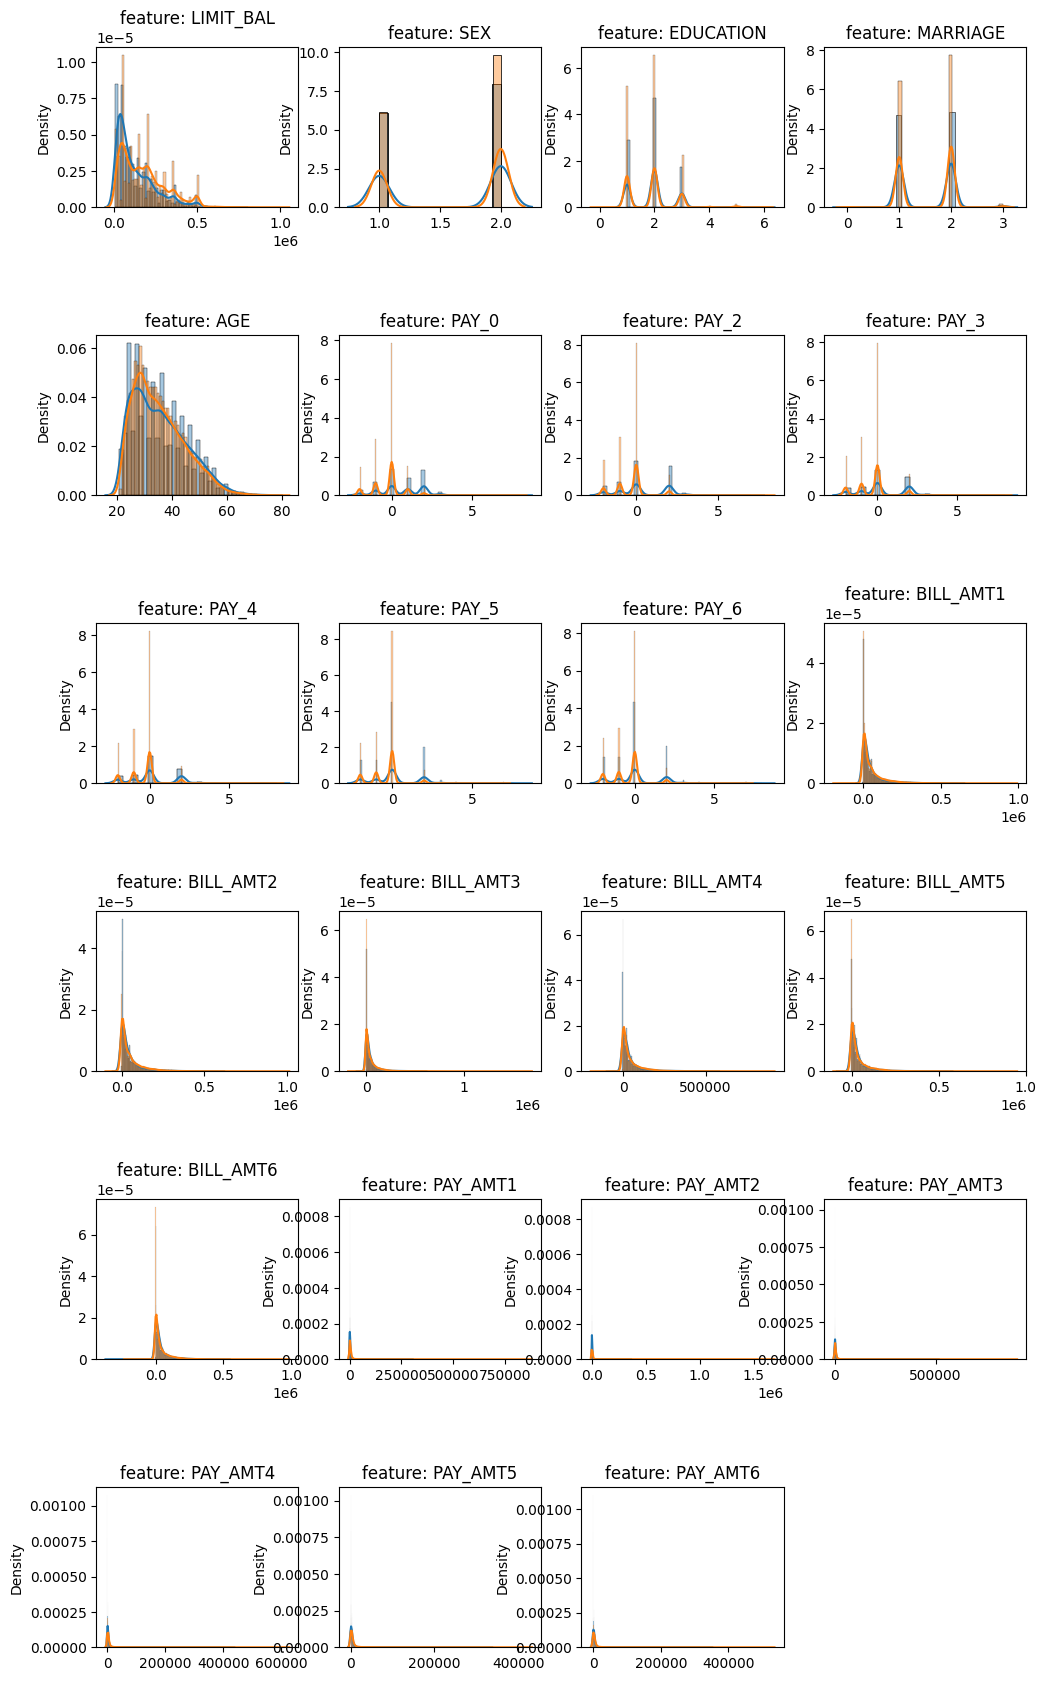

In [24]:
# Representamos gráficamente las características diferenciando entre 0 y 1 la variable dependiente
features = df_c.drop("default payment next month", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(9, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df_c[f][df_c["default payment next month"] == 1], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    sns.histplot(df_c[f][df_c["default payment next month"] == 0], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

<h2>Separaremos la data en entrenamiento validación y testeo para 3 modelos diferentes, regresión logistica, arbol de decision y bosques aleatorios</h2>

<h3>Preparación para Decision tree</h3>

<text> No necesitamos normalizar ni estandarizar los datos para los arboles de decision, unicamente haremos la segmentación entre train, val y test, y luego haremos lo mismo para un conjunto de datos reducido (con las variables que tengan mayor correlación en relación a Default) </text>

In [126]:
#Separamos primero entre train y (val + test) con 70% y 30% respectivamente, usamos la variable stratify para mantener la proporción de Default en los distintos sets
train_set_tree, test_set_tree = train_test_split(df_c, test_size=0.3, random_state=42, stratify=df_c["default payment next month"])
#Ahora separamos entre val y test al 50%
val_set_tree, test_set_tree = train_test_split(test_set_tree, test_size=0.5, random_state=42, stratify=test_set_tree["default payment next month"])

In [127]:
#separacion de variables X e Y
#entrenamiento
X_train_tree = train_set_tree.drop("default payment next month", axis=1)
y_train_tree = train_set_tree["default payment next month"].copy()
#validacion
X_val_tree = val_set_tree.drop("default payment next month", axis=1)
y_val_tree = val_set_tree["default payment next month"].copy()
#test
X_test_tree = test_set_tree.drop("default payment next month", axis=1)
y_test_tree = test_set_tree["default payment next month"].copy()

In [128]:
#aplocamos SMOTE para balancear la variable dependiente en la base de train
smote = SMOTE(random_state=42)
X_resampled_tree, y_resampled_tree = smote.fit_resample(X_train_tree, y_train_tree)

<h3>Preparación para Random Forest</h3>

<text> No necesitamos normalizar ni estandarizar los datos para los bosques aleatorios, unicamente haremos la segmentación entre train y test(ya que el algoritmo puede hacer una validación cruzada en su conjunto de entrenamiento, por lo que no es necesario una validacion extra), luego haremos lo mismo para un conjunto de datos reducido (con las variables que tengan mayor correlación en relación a Default) </text>

In [129]:
#Separamos primero entre train y test con 80% y 20% respectivamente, usamos la variable stratify para mantener la proporción de Default en los distintos sets
train_set_rf, test_set_rf = train_test_split(df_c, test_size=0.2, random_state=42, stratify=df_c["default payment next month"])

In [130]:
#separacion de variables X e Y
#entrenamiento
X_train_rf = train_set_rf.drop("default payment next month", axis=1)
y_train_rf = train_set_rf["default payment next month"].copy()
#test
X_test_rf = test_set_rf.drop("default payment next month", axis=1)
y_test_rf = test_set_rf["default payment next month"].copy()

In [131]:
#aplocamos SMOTE para balancear la variable dependiente en la base de train
smote = SMOTE(random_state=42)
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train_rf, y_train_rf)

<h3>Preparación para Logistic regression</h3>

<text> La regresión logistica si debe ser estandarizada y lo haremos de dos maneras, utilizando MinMaxScaler y RobustScaler  por cada data set  </text>

In [32]:
#Separamos primero entre train y (val + test) con 70% y 30% respectivamente, usamos la variable stratify para mantener la proporción de Default en los distintos sets
train_set_lr, test_set_lr = train_test_split(df_c, test_size=0.3, random_state=42, stratify=df_c["default payment next month"])
#Ahora separamos entre val y test al 50%
val_set_lr, test_set_lr = train_test_split(test_set_tree, test_size=0.5, random_state=42, stratify=test_set_tree["default payment next month"])

In [33]:
#separacion de variables X e Y
#entrenamiento
X_train_lr = train_set_lr.drop("default payment next month", axis=1)
y_train_lr = train_set_lr["default payment next month"].copy()
#validacion
X_val_lr = val_set_lr.drop("default payment next month", axis=1)
y_val_lr = val_set_lr["default payment next month"].copy()
#test
X_test_lr = test_set_lr.drop("default payment next month", axis=1)
y_test_lr = test_set_lr["default payment next month"].copy()

In [34]:
#aplocamos SMOTE para balancear la variable dependiente en la base de train
smote = SMOTE(random_state=42)
X_resampled_lr, y_resampled_lr = smote.fit_resample(X_train_lr, y_train_lr)

<text>Escalamos los datos con la tecnica MinMax</text>

In [35]:
#Entrenamiento
X_train_lr_mm= preprocessing.MinMaxScaler().fit_transform(X_resampled_lr)
X_train_lr_mm=pd.DataFrame(X_train_lr_mm,columns=X_resampled_lr.columns)
#Validacion
X_val_lr_mm= preprocessing.MinMaxScaler().fit_transform(X_val_lr)
X_val_lr_mm=pd.DataFrame(X_val_lr_mm,columns=X_val_lr.columns)
#Testeo
X_test_lr_mm= preprocessing.MinMaxScaler().fit_transform(X_test_lr)
X_test_lr_mm=pd.DataFrame(X_test_lr_mm,columns=X_test_lr.columns)


<text>Escalamos los datos con la tecnica RobustScaler</text>

In [36]:
robust_scaler = RobustScaler()
#Entrenamiento
X_train_lr_rs = robust_scaler.fit_transform(X_resampled_lr)
X_train_lr_rs = pd.DataFrame(X_train_lr_rs, columns=X_resampled_lr.columns)
#Validacion
X_val_lr_rs = robust_scaler.fit_transform(X_val_lr)
X_val_lr_rs = pd.DataFrame(X_val_lr_rs, columns=X_val_lr.columns)
#Testeo
X_test_lr_rs = robust_scaler.fit_transform(X_test_lr)
X_test_lr_rs = pd.DataFrame(X_test_lr_rs, columns=X_test_lr.columns)

<h2> Modelos de decision </h2>

<h3>Decision tree</h3>

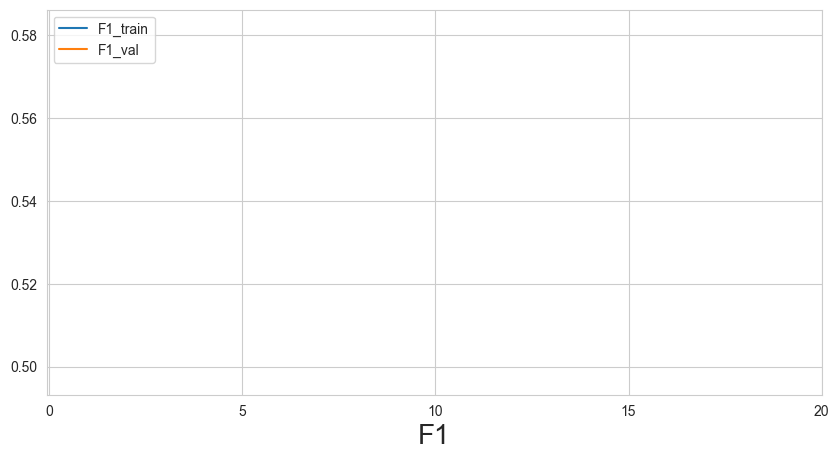

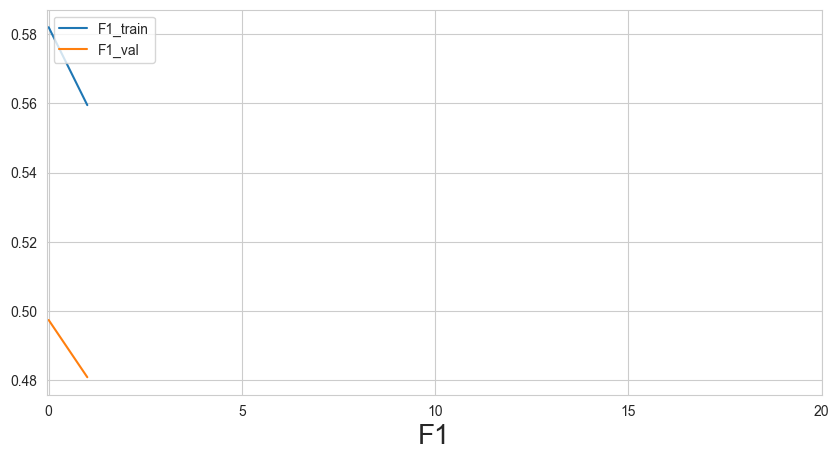

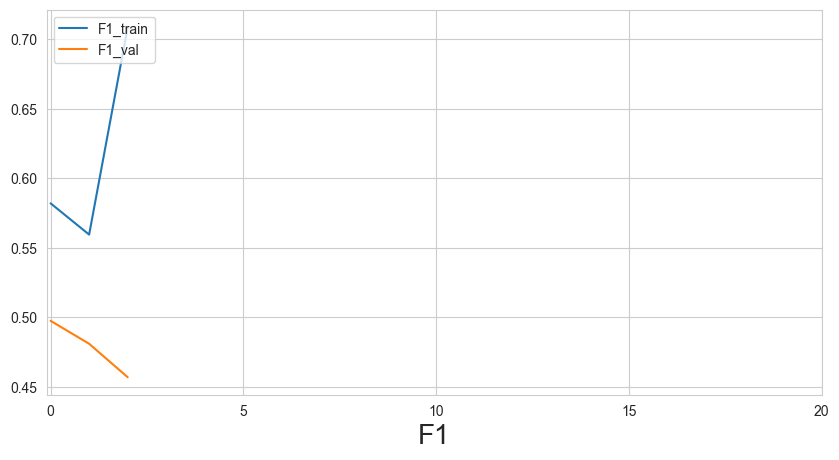

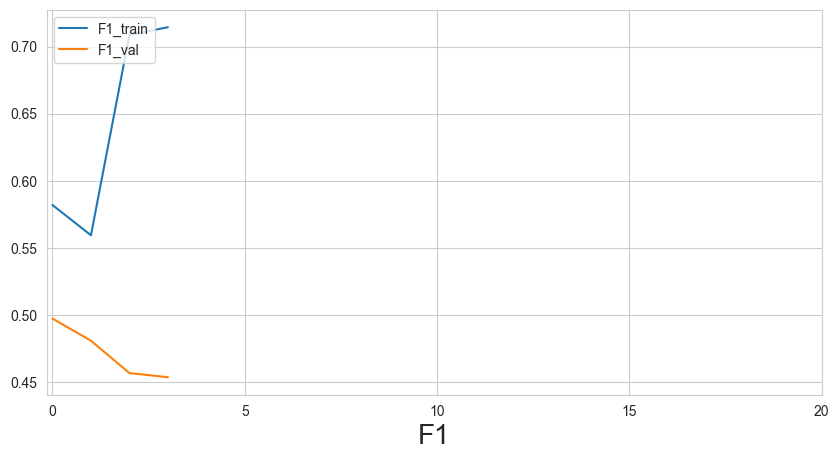

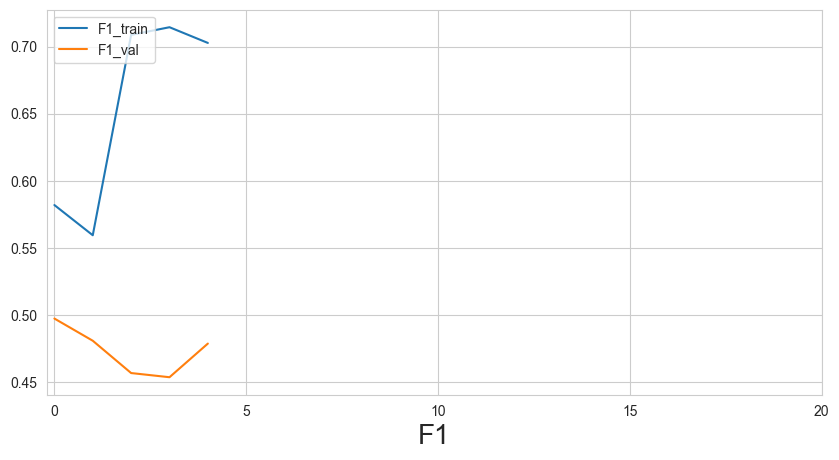

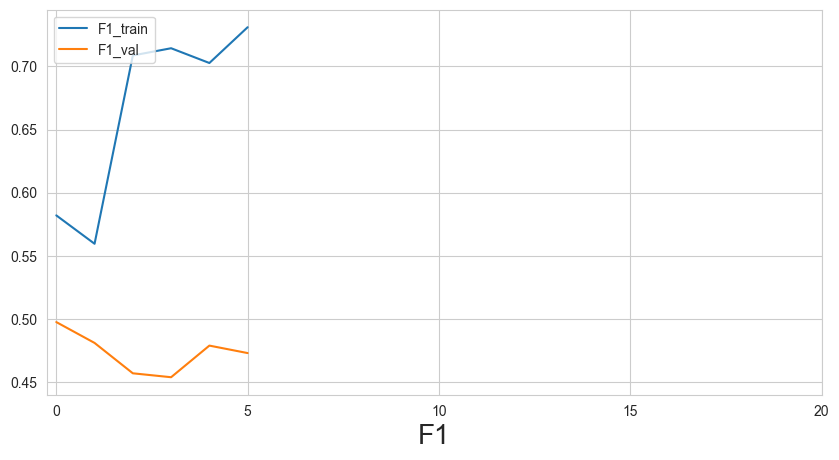

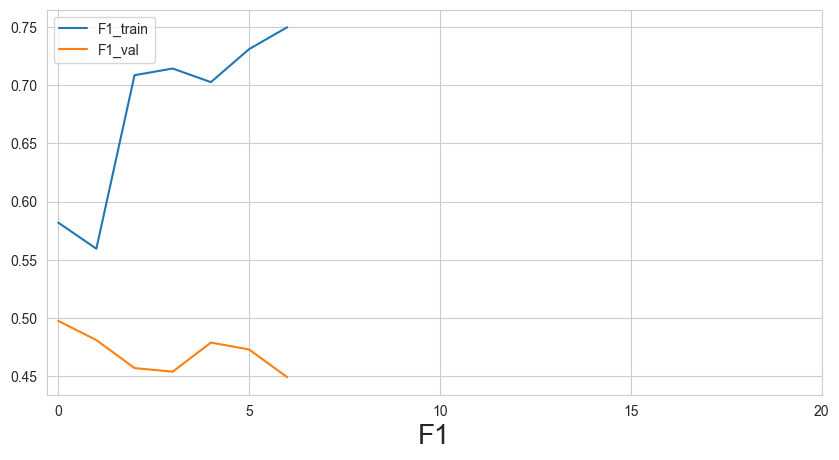

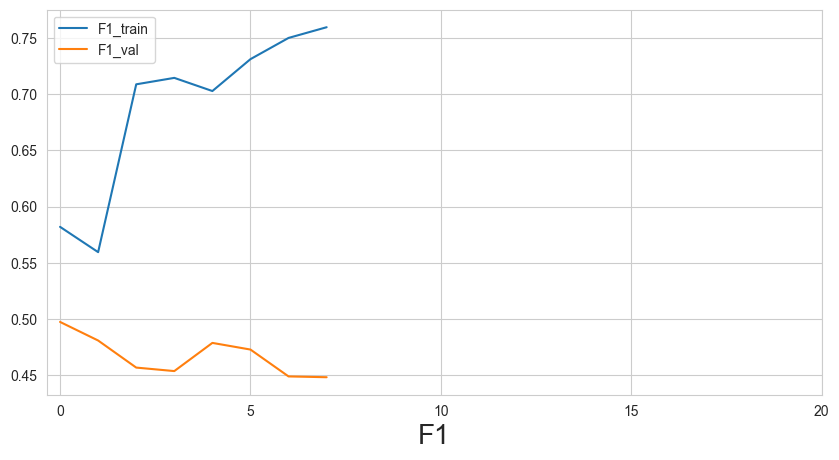

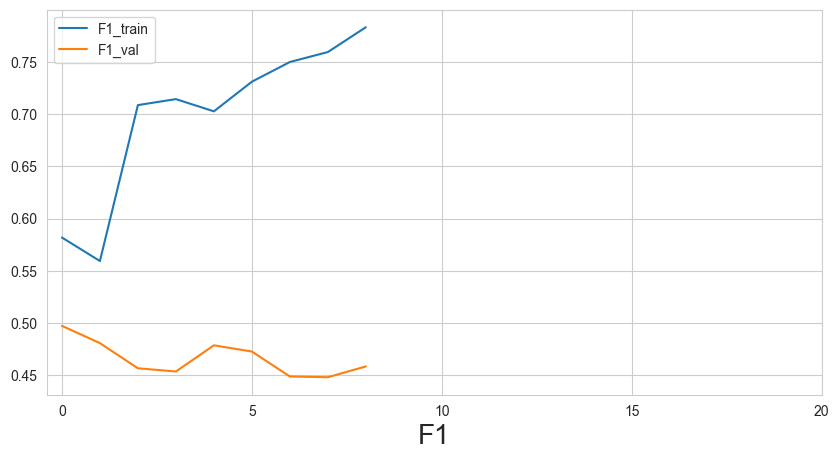

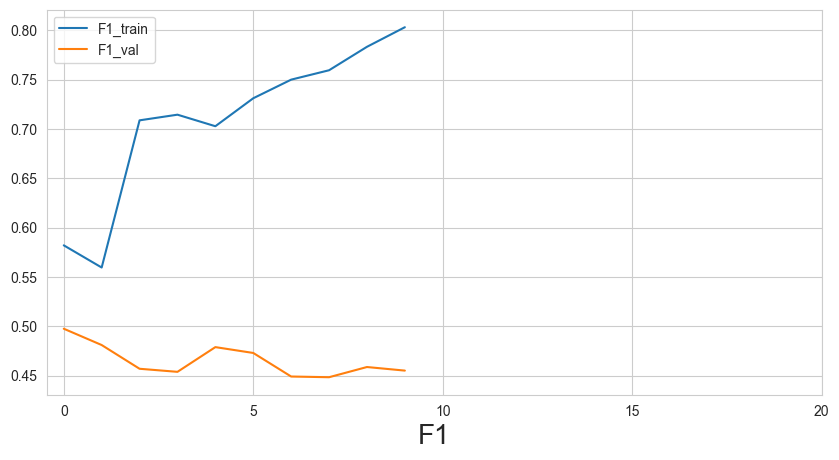

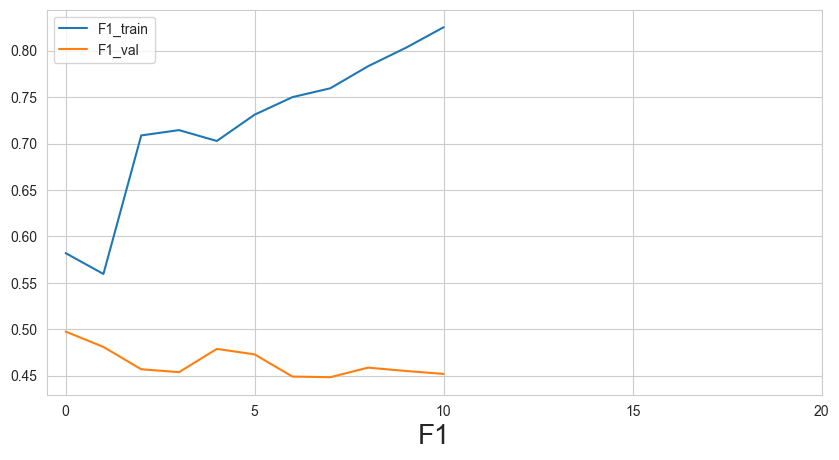

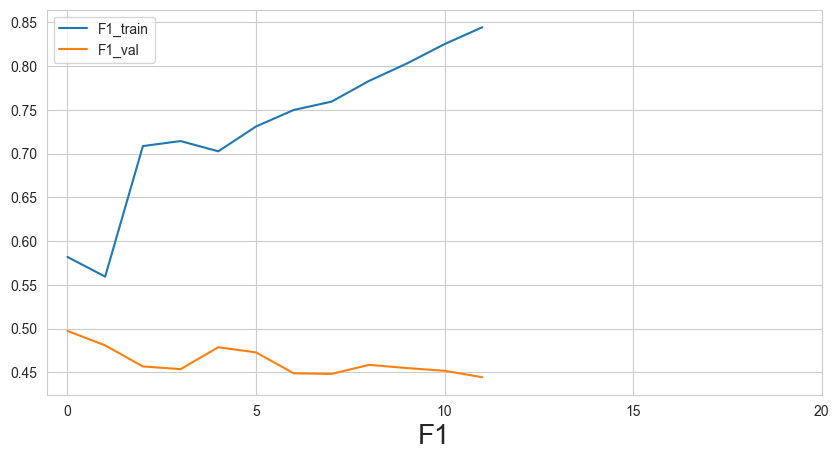

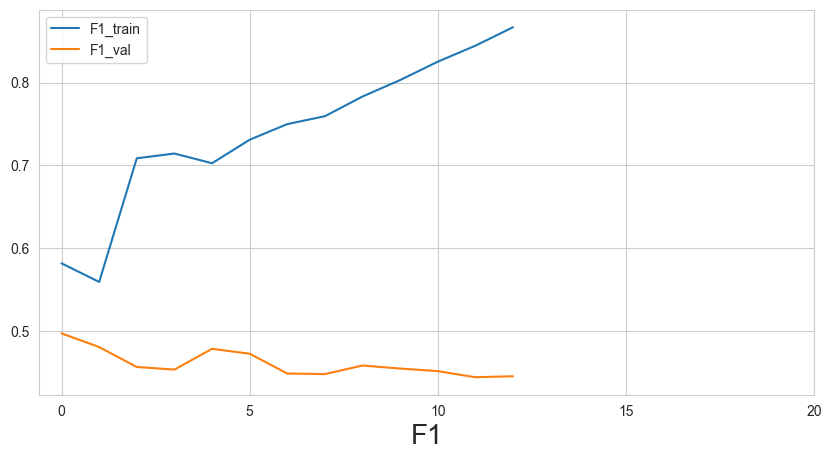

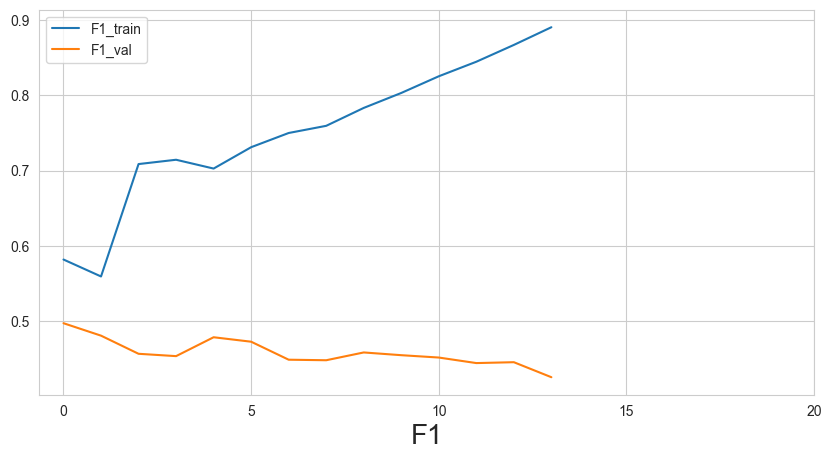

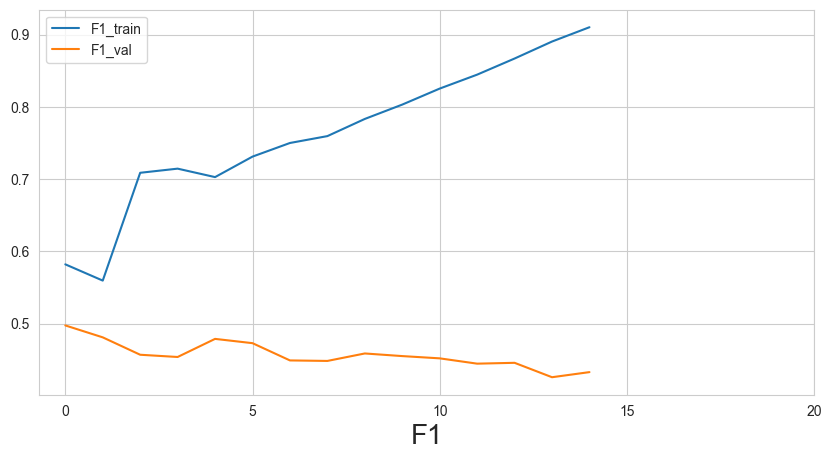

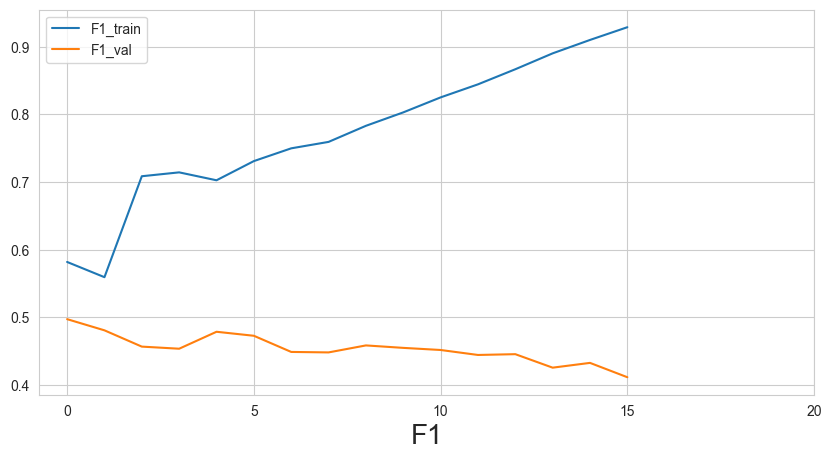

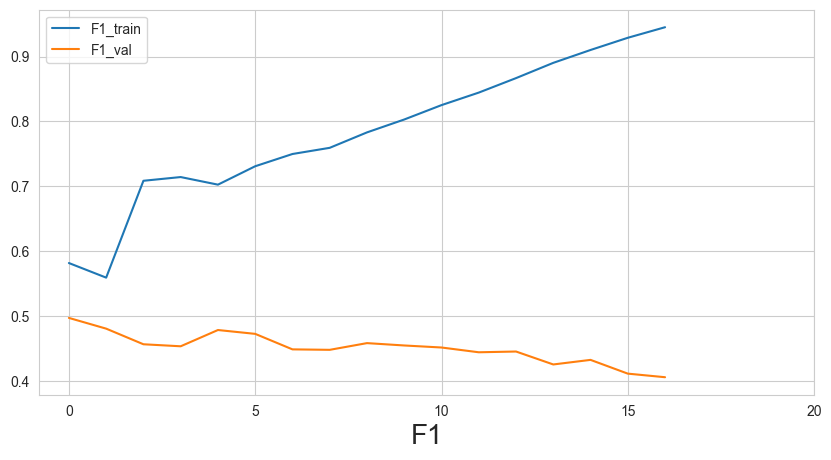

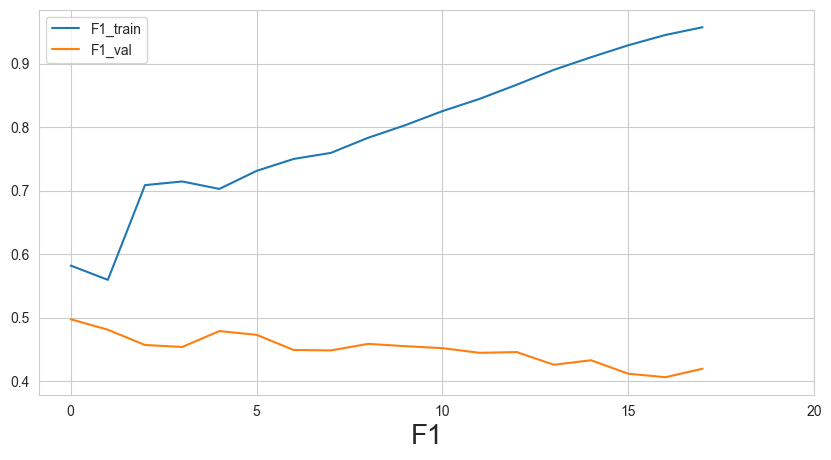

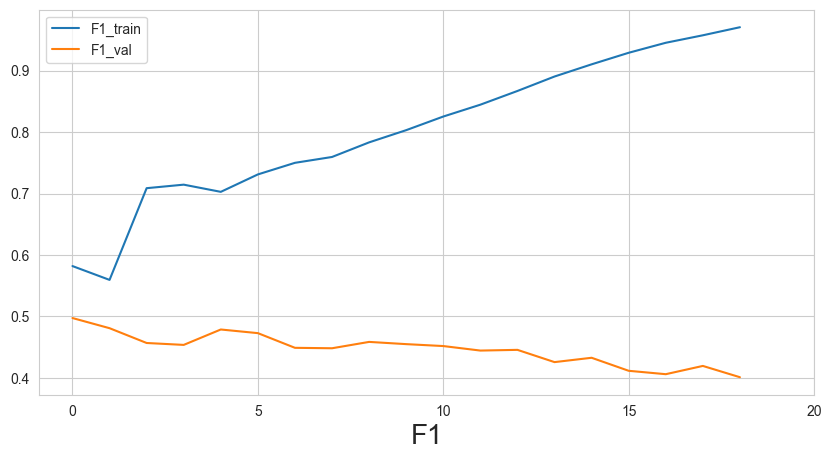

In [140]:
#intento con todas las variables

F1_train_hist_tree=[]
F1_val_hist_tree=[]

for depth in range(1,20):

    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_resampled_tree, y_resampled_tree)
    
    y_train_pred_tree = tree.predict(X_resampled_tree)
    y_val_pred_tree = tree.predict(X_val_tree)
    
    F1_train_tree = f1_score(y_resampled_tree, y_train_pred_tree)
    F1_val_tree = f1_score(y_val_tree, y_val_pred_tree)
    
    F1_train_hist_tree.append(F1_train_tree)
    F1_val_hist_tree.append(F1_val_tree)
    
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    plt.plot(F1_train_hist_tree, label ="F1_train")
    plt.plot(F1_val_hist_tree, label ="F1_val")
    plt.legend(loc="upper left")
    plt.xticks(range(0,21,5))
    plt.xlabel("max_depth",size=20)
    plt.xlabel("F1",size=20)
    plt.show()

<text>Se ve un Overfitting bastante grande<text>

<h3>Logistic Regression</h3>

In [38]:
#Creamos el modelo de entrenamiento con data editada de MM
reg_log = LogisticRegression(max_iter=1000)
reg_log.fit(X_train_lr_mm, y_resampled_lr)

LogisticRegression(max_iter=1000)

In [39]:
#Predecimos con data de entrenamiento y validación
y_train_pred_lr_mm = reg_log.predict(X_train_lr_mm)
y_val_pred_lr_mm = reg_log.predict(X_val_lr_mm)

In [41]:
#Mostramos resultados indicados por F1_Score comparando entre train y val
print("train:", f1_score(y_resampled_lr, y_train_pred_lr_mm))
print("val:",f1_score(y_val_lr, y_val_pred_lr_mm))

train: 0.7225304195911363
val: 0.40696517412935324


<text> Se ve un overfitting en los resultados <text>

In [105]:
#Creamos el modelo de entrenamiento con data editada de RS
reg_log_rs = LogisticRegression(max_iter=1000)
reg_log_rs.fit(X_train_lr_rs, y_resampled_lr)

LogisticRegression(max_iter=1000)

In [106]:
#Predecimos con data de entrenamiento y validación
y_train_pred_lr_rs = reg_log_rs.predict(X_train_lr_rs)
y_val_pred_lr_rs = reg_log_rs.predict(X_val_lr_rs)

In [107]:
#Mostramos resultados indicados por F1_Score comparando entre train y val
print("train:", f1_score(y_resampled_lr, y_train_pred_lr_rs))
print("val:",f1_score(y_val_lr, y_val_pred_lr_rs))

train: 0.7259050880626222
val: 0.39886039886039887


<text>También se ve un gran overfitting <text>

<h3>Random Forest</h3>

In [133]:
param_distribs = {
        'n_estimators': randint(low=100, high=150),
        'max_depth': randint(low=7, high=15),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

# train across 2 folds, that's a total of 5*2=10 rounds of training
rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='f1_weighted')

rnd_search.fit(X_resampled_rf, y_resampled_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F22656C750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F22B2C4D10>},
                   scoring='f1_weighted')

In [134]:
rnd_search.best_params_

{'max_depth': 14, 'n_estimators': 147}

In [135]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=147, n_jobs=-1)

In [136]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.7849536281019888 - Parámetros: {'max_depth': 11, 'n_estimators': 120}
F1 score: 0.7603098420760803 - Parámetros: {'max_depth': 7, 'n_estimators': 136}
F1 score: 0.8044321970262711 - Parámetros: {'max_depth': 14, 'n_estimators': 147}
F1 score: 0.7726781968436244 - Parámetros: {'max_depth': 9, 'n_estimators': 138}
F1 score: 0.7712395556680955 - Parámetros: {'max_depth': 9, 'n_estimators': 116}
F1 score: 0.7592780129878097 - Parámetros: {'max_depth': 7, 'n_estimators': 100}
F1 score: 0.7859030559001364 - Parámetros: {'max_depth': 11, 'n_estimators': 135}
F1 score: 0.8023251344990392 - Parámetros: {'max_depth': 14, 'n_estimators': 101}
F1 score: 0.7799089253992495 - Parámetros: {'max_depth': 10, 'n_estimators': 109}
F1 score: 0.7917109929117351 - Parámetros: {'max_depth': 12, 'n_estimators': 104}


In [137]:
# Seleccionamos el mejor modelo
clf_rnd = rnd_search.best_estimator_

In [138]:
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred_rf = clf_rnd.predict(X_resampled_rf)
# Predecimos con el conjunto de datos de entrenamiento
y_val_pred_rf = clf_rnd.predict(X_test_rf)

In [139]:
# Predicción con el conjunto de datos de entrenamiento
print("F1 score Train Set:", f1_score(y_train_pred_rf, y_resampled_rf, average='weighted'))
# Predicción con el conjunto de datos de validación
print("F1 score Validation Set:", f1_score(y_val_pred_rf, y_test_rf, average='weighted'))

F1 score Train Set: 0.9056819801278541
F1 score Validation Set: 0.7724588421487029


<text>Se ve un Overfitting mucho más pequeño en los otros modelos, por lo que intentaremos mejorar el randomForest<text>

In [92]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [94]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(11)

AGE          0.131226
PAY_0        0.091472
PAY_2        0.055558
LIMIT_BAL    0.049224
BILL_AMT6    0.048688
PAY_6        0.047532
PAY_AMT1     0.044377
EDUCATION    0.044355
ID           0.043337
PAY_3        0.038569
PAY_AMT2     0.038475
dtype: float64

In [69]:
#Agregamos solamente las varialbes más significativas a la data para correr nuevamente el modelo de RandomForest
X_train_rf_reduced=X_resam_rf[['AGE', 'PAY_0', 'PAY_3', 'PAY_2', 'PAY_4', 'PAY_5', 'PAY_AMT1', 'PAY_6', 'PAY_AMT2']]
X_val_rf_reduced=X_test_rf[['AGE', 'PAY_0', 'PAY_3', 'PAY_2', 'PAY_4', 'PAY_5', 'PAY_AMT1', 'PAY_6', 'PAY_AMT2']]

In [98]:
param_distribs = {
        'n_estimators': randint(low=100, high=150),
        'max_depth': randint(low=7, high=15),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

# train across 2 folds, that's a total of 5*2=10 rounds of training
rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='f1_weighted')

rnd_search.fit(X_train_rf_reduced, y_resampled_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F2263C7F50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F2264E3D10>},
                   scoring='f1_weighted')

F1 score: 0.7542284453768413 - Parámetros: {'max_depth': 14, 'n_estimators': 119}
F1 score: 0.7434531666873072 - Parámetros: {'max_depth': 8, 'n_estimators': 146}
F1 score: 0.7556635577165158 - Parámetros: {'max_depth': 14, 'n_estimators': 126}
F1 score: 0.7465295064324976 - Parámetros: {'max_depth': 9, 'n_estimators': 132}
F1 score: 0.746938464758966 - Parámetros: {'max_depth': 9, 'n_estimators': 125}
F1 score: 0.7374691530054635 - Parámetros: {'max_depth': 7, 'n_estimators': 128}
F1 score: 0.75272890091961 - Parámetros: {'max_depth': 13, 'n_estimators': 134}
F1 score: 0.7492233142175783 - Parámetros: {'max_depth': 10, 'n_estimators': 146}
F1 score: 0.7502791093528827 - Parámetros: {'max_depth': 11, 'n_estimators': 131}
F1 score: 0.7433391450699057 - Parámetros: {'max_depth': 8, 'n_estimators': 127}


In [99]:
rnd_search.best_params_


{'max_depth': 14, 'n_estimators': 149}

In [100]:
rnd_search.best_estimator_


RandomForestClassifier(max_depth=14, n_estimators=149, n_jobs=-1)

In [101]:
# Seleccionamos el mejor modelo
clf_rnd = rnd_search.best_estimator_

In [102]:
# Predicción# Predecimos con el conjunto de datos de entrenamiento
y_train_pred_rf = clf_rnd.predict(X_train_rf_reduced)
y_val_pred_rf = clf_rnd.predict(X_val_rf_reduced)


In [103]:
print("F1 score Train Set:", f1_score(y_train_pred_rf, y_resampled_rf, average='weighted'))
print("F1 score Train Set:", f1_score(y_val_pred_rf, y_test_rf, average='weighted'))

F1 score Train Set: 0.8170769544492117
F1 score Train Set: 0.7866768777514292


<text>El mejor resultado se obtuvo con el modelo de Random Forest reducido, con un muy pequeño overfitting<text>